# 图像处理+180776+胡欣毅(Python版)
# 5周上课随堂任务

## 1. 题目清单

1. sigmoid函数的边缘增强
2. 阶跃函数柔化后的边缘增强
3. 图像处理预告热传导方程

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 第一部分

In [2]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x) )

In [3]:
x = np.linspace(-10,10,200)
y = sigmoid(x)
dy = np.diff(y)
ddy = np.diff(dy)

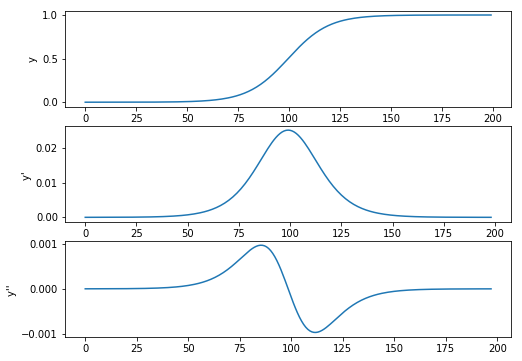

In [4]:
plt.figure(figsize=(8,6))
plt.subplot(311)
plt.plot(y)
plt.ylabel("y")
plt.subplot(312)
plt.plot(dy)
plt.ylabel("y' ")
plt.subplot(313)
plt.plot(ddy)
plt.ylabel("y'' ")
plt.savefig("../ddf.png")
plt.show()

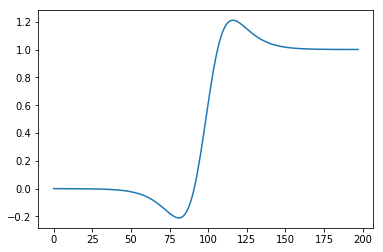

In [5]:
lamb = 400
out = y[1:-1] - lamb * ddy
plt.figure()
plt.plot(out)
plt.show()

# 第二部分

In [6]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

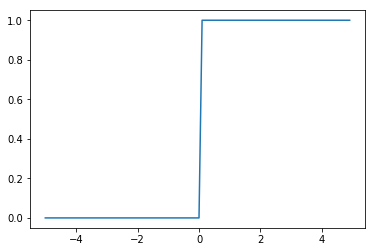

In [7]:
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.show()

In [8]:
sigma = 1.

In [9]:
def gaosi(sigma,x):
    return np.exp(-x**2/(2*sigma**2) )/(np.sqrt(2*np.pi)*sigma)

/home/huxinyi/miniconda3/envs/hxy/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


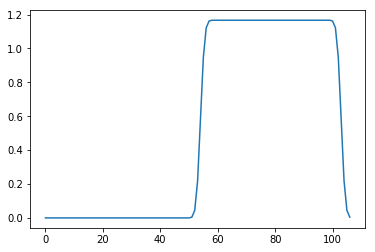

In [10]:
import scipy.signal
gaosi_filter = gaosi(sigma, np.linspace(-3*sigma,3*sigma, 8*sigma ) )

out = scipy.signal.convolve(Y,gaosi_filter)
plt.figure()
plt.plot(out)
plt.show()

In [11]:
dout = np.diff(out)
ddout = np.diff(dout)

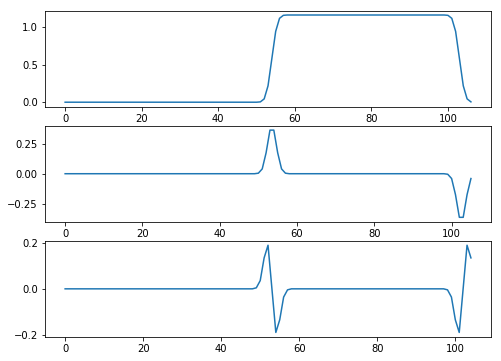

In [12]:
plt.figure(figsize=(8,6))
plt.subplot(311)
plt.plot(out)
plt.subplot(312)
plt.plot(dout)
plt.subplot(313)
plt.plot(ddout)
plt.show()

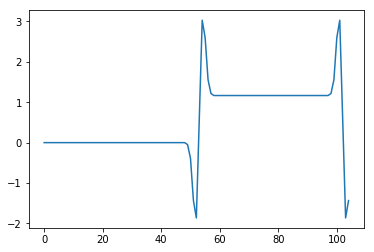

In [13]:
lambd = 11
result = out[1:-1] - lambd * ddout
plt.figure()
plt.plot(result)
plt.show()

## 拓展

高斯函数　$$ -3\sigma ～  3\sigma $$占据大部分能量

In [14]:
sga = 1.
xx = np.linspace(-3*sga,3*sga,int(6*sga+1))
gaosi(sga,xx).sum()

0.9997293592899715

In [15]:
def conv_func(a, b, conv=True):
    if a.shape > b.shape:
        return conv_func( b, a)
    
    # Convert to np.array type
    a, b = list(map(np.array, [a, b]))
    
    # 反转
    if conv: 
        a = a[::-1] 
    res = []
    min_len, max_len = len(a), len(b)

    output_length = max_len + min_len - 1
    tmp = np.hstack((np.zeros(min_len-1), b, np.zeros(min_len-1)))

    # For each point, get the total sum of element-wise multiplication
    for i in range(output_length):
        val = np.sum(a * tmp[i:min_len+i])
        res.append(val)
    return np.array(res, dtype=a.dtype)

conv_func(Y,gaosi_filter) = out

## 图像处理预告

热力学传导方程
$$ \frac{\partial f}{\partial t} = \frac{1}{2} \frac{\partial^2 f}{\partial x^2} $$

图像模糊恢复
$$ f(x,t)=f(x,0)+t\frac{\partial f}{\partial t} 
  =f(x,0)+\frac {t}{2}\frac{\partial^2 f}{\partial x^2} $$

# 图像处理+180776+胡欣毅(C++版)

[c++](c++/hxy.cpp)